### 1. Se pide: (regression)

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- SVR

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal, ROUND_HALF_DOWN # Para poder rendondear correctamente
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [17]:
df = pd.read_csv("../data/USA_Housing.csv")

In [18]:
df.drop('Address', axis=1, inplace=True)
# Eliminamos la columna 'Address' por ser una variable categórica que no podemos codificar
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


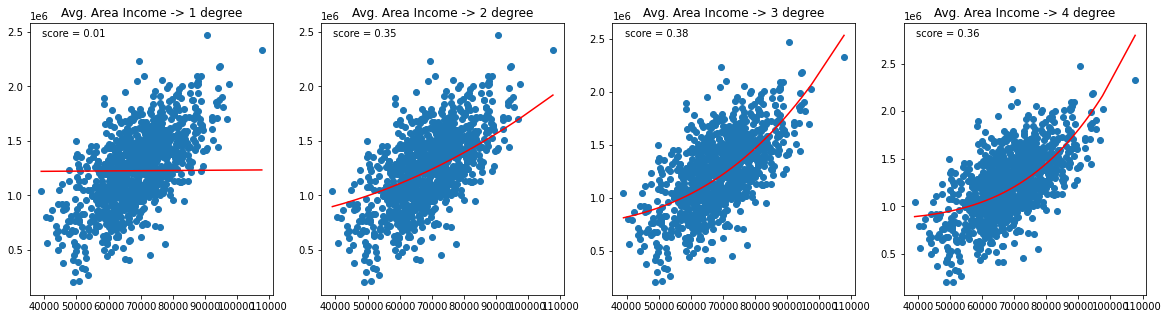

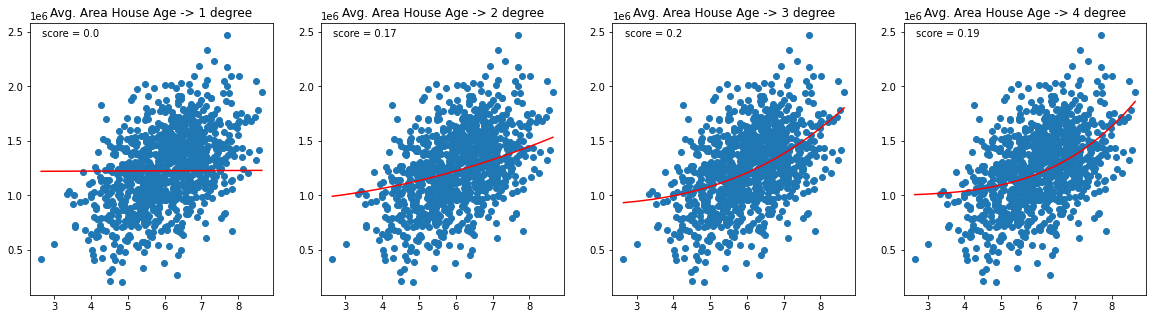

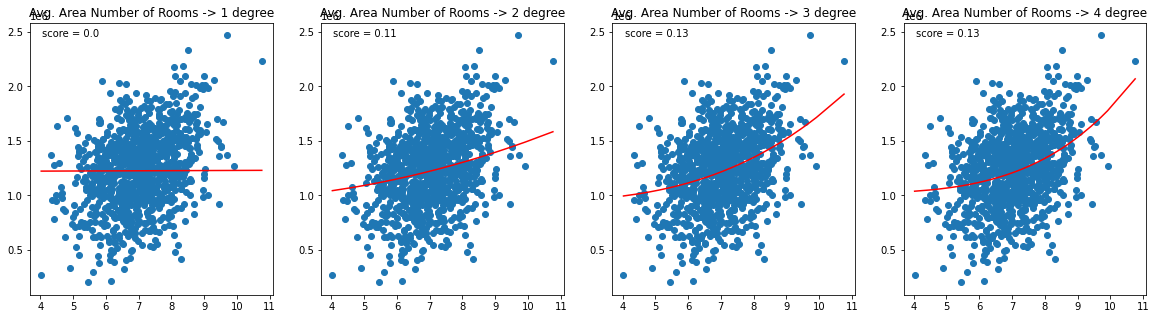

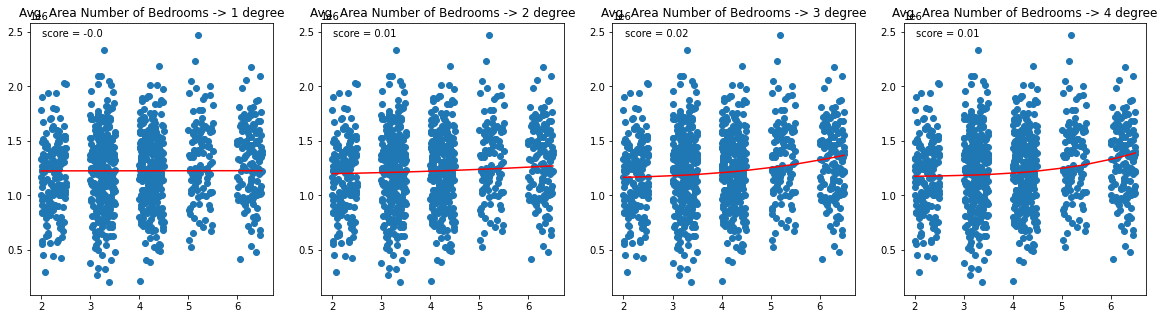

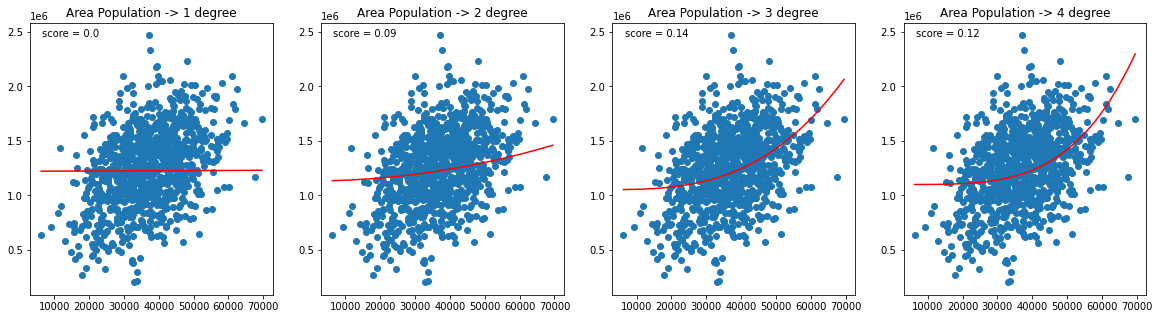

In [19]:
seed = 42


for i in range(len(df.columns) - 1):
    fig, ax = plt.subplots(ncols=4, figsize=(20, 5))

    for k in range(1, 5):
        model = SVR(kernel='poly', degree=k)
        X_train, X_test, y_train, y_test = train_test_split(df[df.columns[i]].values.reshape(-1, 1), df['Price'], test_size=0.2,random_state=seed)
        model.fit(X_train, y_train)
        X_train_show, y_train_show = zip(*(sorted(zip(X_test, model.predict(X_test)))))
        ax[k - 1].scatter(X_test, y_test)
        ax[k - 1].plot(X_train_show, y_train_show, c='red')
        ax[k - 1].set_title(f'{df.columns[i]} -> {k} degree')
        ax[k - 1].annotate(f'score = {round(model.score(X_test, y_test), 2)}', xy=(0.05, 0.95), xycoords='axes fraction')
        

### 2. Se pide: (classification)

En el anterior dataset, la columna "Avg. Area Number of Bedrooms" está en un rango numérico limitado:

1. Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

2. Cuando lo hayas hecho, tendrás una columna con números enteros en un rango limitado. Ahora trata a esa columna como una serie de valores discretos (classes, labels). 

3. Usando las demás columnas numéricas y una a una, utiliza SVM (SVC) para clasificar esa columna modificada.

4. Usando todas las demás columnas a la vez, utiliza SVM para clasificar esa columna modificada. Es decir, "Avg. Area Income" con nuestro target, después "Avg. Area House Age", ... ¿hace aumentar el score? ¿por qué? 

5. ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target? 

-------------------------- 

ACLARACIÓN del apartado 2 del ejercicio 2:

- En el punto 3, se espera que tu X sea una sola columna e y también, 'Avg. Area Number of Bedrooms'.

- En el punto 4, se espera que tu X sean todas las columnas que cumplen con las características especificadas y la columna 'Avg. Area Number of Bedrooms'

Primero vamos a cambiar los datos de la columna 'Avg. Area Number of Bedrooms' a datos de tipo entero, redondeando al entero más cercano. Cuando el número decimal esté a la misma distancia de los dos enteros más cercanos, este se redondeara al más pequeño. 

In [20]:
round_func = lambda x: Decimal(x).quantize(exp= 1, rounding='ROUND_HALF_DOWN') # Función para redondear correctamente

In [21]:
df['target'] = df['Avg. Area Number of Bedrooms'].apply(round_func).astype(int)
# Redondeamos cada dato de la columna y nos aseguramos de convertirlos a enteros

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   target                        5000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 273.6 KB


In [23]:
df = pd.concat([df.drop('Avg. Area Number of Bedrooms', axis=1), df['Avg. Area Number of Bedrooms']], axis=1)
# Pasamos nuestra columna target a la última posición para trabajar mas comodamente

In [24]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price,target,Avg. Area Number of Bedrooms
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06,4,4.09
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06,3,3.09
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06,5,5.13
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06,3,3.26
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05,4,4.23


Creamos el módelo y establecemos una semilla

In [25]:
seed = 42

In [26]:
model = SVC()

Primero analizamos las columnas una a una

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], test_size=0.2, random_state=seed)
for column in df.columns[:-1]:
    X_train, X_test, y_train, y_test = train_test_split(df[column].values.reshape(-1, 1), df['target'], test_size=0.2, random_state=seed)
    model.fit(X_train,y_train)
    print(f'El score con la columna {column} es ---> {model.score(X_test, y_test)}')

El score con la columna Avg. Area Income es ---> 0.292
El score con la columna Avg. Area House Age es ---> 0.306
El score con la columna Avg. Area Number of Rooms es ---> 0.292
El score con la columna Area Population es ---> 0.302
El score con la columna Price es ---> 0.298
El score con la columna target es ---> 1.0


Cross Validation

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], test_size=0.2, random_state=seed)
model.fit(X_train,y_train)
print(f'El score con todas las columnas es ---> {model.score(X_test, y_test)}')

El score con todas las columnas es ---> 0.306
